In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data_train = pd.read_csv('./data/train.csv')

In [41]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [42]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
data_train = data_train.drop(["Name"], axis = 1)

In [44]:
#data_train["Ticket"].unique()

In [45]:
data_train = data_train.drop(["Ticket"], axis = 1)

In [46]:
#data_train["Cabin"].unique()

In [47]:
data_train = data_train.drop(["Cabin"], axis = 1)

In [48]:
#data_train["Embarked"].unique()

In [49]:
data_train = data_train.drop(["Embarked"], axis = 1)

In [50]:
data_train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250


In [51]:
cat_columns = data_train.select_dtypes(['object']).columns
print(cat_columns)

Index(['Sex'], dtype='object')


In [52]:
data_train[cat_columns] = data_train.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')

In [53]:
#data_train.select_dtypes(['object'])

In [54]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: category(1), float64(2), int64(5)
memory usage: 49.8 KB


In [55]:
data_train[cat_columns]= data_train[cat_columns].apply(lambda x: x.cat.codes)

In [56]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int8
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), int8(1)
memory usage: 49.7 KB


29.69911764705882


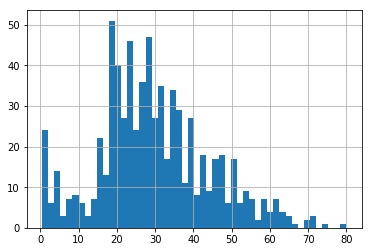

In [57]:
data_train["Age"].hist(bins = 50)
mean = data_train["Age"].mean()
print(mean)

In [58]:
data_train["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [59]:
index = data_train['Age'].index[data_train['Age'].apply(np.isnan)]
data_train.loc[:'Age'][index] = mean # how does it work?

KeyError: "Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,\n            ...\n            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],\n           dtype='int64', length=177) not in index"

In [60]:
data_train = data_train.drop(["PassengerId"],axis = 1)

In [61]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int8
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), int8(1)
memory usage: 42.7 KB


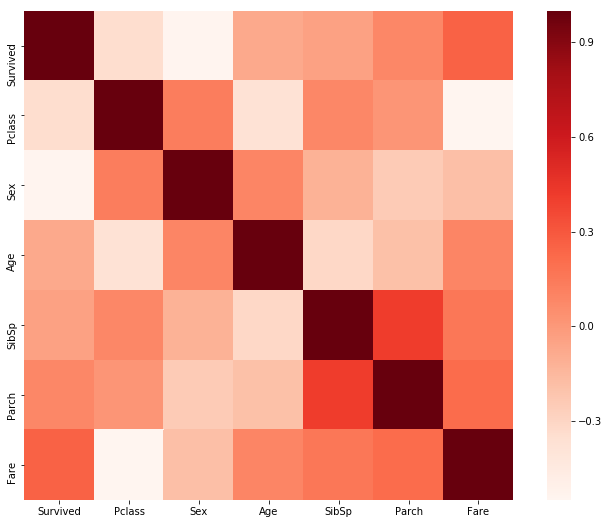

In [62]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, cmap="Reds");

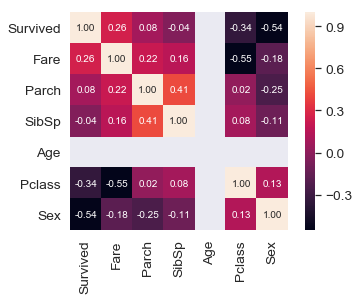

In [63]:
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [64]:
labels_train = data_train["Survived"]
data_train = data_train.drop(["Survived"],axis = 1)

In [65]:
data_tr_np = data_train.values

In [66]:
print(data_tr_np.shape)

(891, 6)


In [67]:
labels_tr_np = labels_train.values
print(labels_tr_np.shape)

(891,)


# Model

In [68]:
import tensorflow as tf
from tensorflow import keras

In [69]:
model = keras.Sequential()
#model.add(keras.layers.Dense(30, activation = tf.nn.relu))
model.add(keras.layers.Dense(10, activation = tf.nn.sigmoid, input_shape=(6,), name = "Dense_1"))
model.add(keras.layers.Dense(5, activation = tf.nn.sigmoid, name = "Dense_2"))
model.add(keras.layers.Dense(1, activation = tf.nn.sigmoid, name = "Dense_3"))

In [70]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
Dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
Dense_3 (Dense)              (None, 1)                 6         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(data_tr_np, labels_tr_np, epochs=300)

Epoch 1/300
891/891 [==============================] - 0s 487us/step - loss: 0.6731 - acc: 0.6162
Epoch 2/300
891/891 [==============================] - 0s 34us/step - loss: 0.6651 - acc: 0.6162
Epoch 3/300
891/891 [==============================] - 0s 37us/step - loss: 0.6584 - acc: 0.6162
Epoch 4/300
891/891 [==============================] - 0s 39us/step - loss: 0.6515 - acc: 0.6162
Epoch 5/300
891/891 [==============================] - 0s 43us/step - loss: 0.6444 - acc: 0.6162
Epoch 6/300
891/891 [==============================] - 0s 28us/step - loss: 0.6394 - acc: 0.6162
Epoch 7/300
891/891 [==============================] - 0s 76us/step - loss: 0.6347 - acc: 0.6162
Epoch 8/300
891/891 [==============================] - 0s 35us/step - loss: 0.6315 - acc: 0.6162
Epoch 9/300
891/891 [==============================] - 0s 19us/step - loss: 0.6280 - acc: 0.6162
Epoch 10/300
891/891 [==============================] - 0s 46us/step - loss: 0.6254 - acc: 0.6162
Epoch 11/300
891/891 [======

891/891 [==============================] - 0s 29us/step - loss: 0.4271 - acc: 0.8103
Epoch 168/300
891/891 [==============================] - 0s 40us/step - loss: 0.4281 - acc: 0.8249
Epoch 169/300
891/891 [==============================] - 0s 42us/step - loss: 0.4280 - acc: 0.8238
Epoch 170/300
891/891 [==============================] - 0s 34us/step - loss: 0.4268 - acc: 0.8283
Epoch 171/300
891/891 [==============================] - 0s 37us/step - loss: 0.4259 - acc: 0.8193
Epoch 172/300
891/891 [==============================] - 0s 33us/step - loss: 0.4256 - acc: 0.8294
Epoch 173/300
891/891 [==============================] - 0s 33us/step - loss: 0.4260 - acc: 0.8294
Epoch 174/300
891/891 [==============================] - 0s 29us/step - loss: 0.4268 - acc: 0.8215
Epoch 175/300
891/891 [==============================] - 0s 35us/step - loss: 0.4271 - acc: 0.8159
Epoch 176/300
891/891 [==============================] - 0s 35us/step - loss: 0.4254 - acc: 0.8305
Epoch 177/300
891/891 [=

In [72]:
data_test = pd.read_csv('./data/test.csv')

In [73]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [74]:
Id = data_test["PassengerId"]

In [75]:
data_test = data_test.drop(["Name"], axis = 1)

In [76]:
data_test = data_test.drop(["Ticket"], axis = 1)

In [77]:
data_test = data_test.drop(["Cabin"], axis = 1)

In [78]:
data_test = data_test.drop(["Embarked"], axis = 1)

In [79]:
cat_columns = data_test.select_dtypes(['object']).columns
print(cat_columns)

Index(['Sex'], dtype='object')


In [80]:
data_test[cat_columns] = data_test.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')

In [81]:
data_test[cat_columns]= data_test[cat_columns].apply(lambda x: x.cat.codes)

29.69911764705882


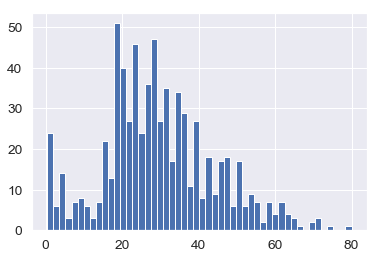

In [82]:
data_train["Age"].hist(bins = 50)
mean = data_train["Age"].mean()
print(mean)

In [83]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int8
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
dtypes: float64(2), int64(4), int8(1)
memory usage: 20.1 KB


In [85]:
index = data_test['Age'].index[data_test['Age'].apply(np.isnan)]
data_test.loc[:'Age'][index] = mean # or data_test['Age'][index] = mean 

In [86]:
data_test = data_test.drop(["PassengerId"],axis = 1)

In [87]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null int8
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
dtypes: float64(2), int64(3), int8(1)
memory usage: 16.8 KB


In [94]:
index = data_test["Fare"].index[data_test["Fare"].apply(np.isnan)]
data_test["Fare"][152] = 0 #???
#print(data_train["Fare"])
#np.where(pd.isnull(data_train))
#np.where(data.applymap(lambda x: x == ''))

c:\users\nuclear\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
data_tr_np = data_test.values

In [96]:
print(data_tr_np.shape)

(418, 6)


In [97]:
predictions = model.predict(data_tr_np)

In [98]:
print(predictions.shape)

(418, 1)


In [99]:
predictions.reshape(418,)

array([0.6884176 , 0.69556856, 0.6968479 , 0.68221986, 0.67386276,
       0.67483103, 0.6848587 , 0.68358034, 0.678911  , 0.68166137,
       0.6854403 , 0.67562747, 0.681703  , 0.67603123, 0.6859886 ,
       0.68461686, 0.67901605, 0.6821555 , 0.6824372 , 0.69531214,
       0.68656933, 0.6879982 , 0.6851145 , 0.68356127, 0.67557585,
       0.6793755 , 0.68475294, 0.68308944, 0.67543596, 0.6729485 ,
       0.6757413 , 0.6855983 , 0.6721185 , 0.67363703, 0.6857604 ,
       0.6805414 , 0.68367046, 0.6777793 , 0.67963123, 0.6858105 ,
       0.67913145, 0.6788355 , 0.6925308 , 0.67669415, 0.68626976,
       0.68283844, 0.6753084 , 0.68584245, 0.685912  , 0.6756463 ,
       0.6848672 , 0.67499125, 0.684469  , 0.6755711 , 0.67543584,
       0.6819554 , 0.68851113, 0.68349993, 0.67474514, 0.6755712 ,
       0.67812455, 0.6772836 , 0.67903584, 0.68023646, 0.67557114,
       0.67364776, 0.67757916, 0.680947  , 0.6799095 , 0.6758467 ,
       0.68136036, 0.6805886 , 0.6836176 , 0.68133503, 0.67557

In [100]:
pred = np.where(predictions > 0.5, 1, 0)
pred.shape
Id = np.array([Id])
Id = Id.reshape(418,1)

In [101]:
data_np = np.concatenate((Id, pred), axis = 1)

In [102]:
#print(data_np.shape, data_np)

In [103]:
out_data =  pd.DataFrame({'PassengerId' : data_np[:,0].tolist(),'Survived' : data_np[:,1].tolist() })

In [104]:
print(out_data)

     PassengerId  Survived
0            892         1
1            893         1
2            894         1
3            895         1
4            896         1
5            897         1
6            898         1
7            899         1
8            900         1
9            901         1
10           902         1
11           903         1
12           904         1
13           905         1
14           906         1
15           907         1
16           908         1
17           909         1
18           910         1
19           911         1
20           912         1
21           913         1
22           914         1
23           915         1
24           916         1
25           917         1
26           918         1
27           919         1
28           920         1
29           921         1
..           ...       ...
388         1280         1
389         1281         1
390         1282         1
391         1283         1
392         1284         1
3

In [105]:
out_data.to_csv("test_.csv", sep=',', encoding='utf-8', index = False)